In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [ ]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training 64
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [ ]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs) #visualize it
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
train(10)

Train Epoch: 10 [0/60000 (0%)]	Loss: 2.468515
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.626268
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.490572
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.599415
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.334295
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.390421
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.441052
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.291624
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.504544
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.401475


In [ ]:
test()


Test set: Average loss: 0.3310, Accuracy: 9079/10000 (91%)



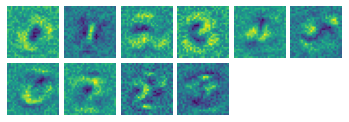

torch.Size([10, 784])


In [ ]:
#subquestion 2a(plotting out the weight)
#Training a Single Layer Network on MNIST [10%]
import torch
import torchvision.models as models
from matplotlib import pyplot as plt

def plot_kernels(tensor, num_cols=6):
    #if not tensor.ndim==4:
        #raise Exception("assumes a 4D tensor")
    #if not tensor.shape[-1]==3:
        #raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i].reshape(28,28))
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
  
#vgg = models.vgg16(pretrained=True)
#mm = vgg.double()
#filters = mm.modules
#body_model = [i for i in mm.children()][0]
#layer1 = body_model[0]
#tensor = layer1.weight.data.numpy()
plot_kernels(network.linear.weight.data)
print(network.linear.weight.data.shape)

In [ ]:
#subquestion 2b
#change from 100 to 50 in train function
#Training a Single Layer Network on MNIST [10%]
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 1   # input batch size for training 64
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs) #visualize it
optimizer = optim.SGD(network.parameters(), lr=lr)

def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 50 == 0: #changing from 100 to 50
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
train(10)

Train Epoch: 10 [0/60000 (0%)]	Loss: 2.402993
Train Epoch: 10 [50/60000 (0%)]	Loss: 0.044409
Train Epoch: 10 [100/60000 (0%)]	Loss: 0.147640
Train Epoch: 10 [150/60000 (0%)]	Loss: 0.255049
Train Epoch: 10 [200/60000 (0%)]	Loss: 0.102897
Train Epoch: 10 [250/60000 (0%)]	Loss: 0.046773
Train Epoch: 10 [300/60000 (0%)]	Loss: 0.045282
Train Epoch: 10 [350/60000 (1%)]	Loss: 0.048033
Train Epoch: 10 [400/60000 (1%)]	Loss: 0.000371
Train Epoch: 10 [450/60000 (1%)]	Loss: 0.001241
Train Epoch: 10 [500/60000 (1%)]	Loss: 0.007524
Train Epoch: 10 [550/60000 (1%)]	Loss: 0.023137
Train Epoch: 10 [600/60000 (1%)]	Loss: 1.102103
Train Epoch: 10 [650/60000 (1%)]	Loss: 0.001468
Train Epoch: 10 [700/60000 (1%)]	Loss: 0.002345
Train Epoch: 10 [750/60000 (1%)]	Loss: 0.963412
Train Epoch: 10 [800/60000 (1%)]	Loss: 6.031705
Train Epoch: 10 [850/60000 (1%)]	Loss: 0.276054
Train Epoch: 10 [900/60000 (2%)]	Loss: 0.000003
Train Epoch: 10 [950/60000 (2%)]	Loss: 0.000000
Train Epoch: 10 [1000/60000 (2%)]	Loss: 0.8

In [ ]:
#subquestion3
#modified linear to tanh
## network and optimizer
#https://discuss.pytorch.org/t/output-from-hidden-layers/6325
#https://discuss.pytorch.org/t/possible-to-add-initialize-new-nodes-to-hidden-layer-partway-through-training/3809/4
#https://discuss.pytorch.org/t/adding-new-hidden-layer-to-lstm/12753/10

if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_outputs)
        #self.nonlinear = nn.Tanh()
        #self.nonlinear = nn.Tanh(num_inputs)
    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        input = F.tanh(input)
        output1 = self.nonlinear(input)

        input = self.linear1(input)
        input =F.tanh(input)

        input = input.view(output1, num_inputs)
        input = F.tanh(input)
        output2 = self.nonlinear(input)

        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
#subquestion 3 #continued part
## network and optimizer
#https://towardsdatascience.com/building-neural-network-using-pytorch-84f6e75f9a

if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
hidden_outputs = 1000

class Net(nn.Module):
    def __init__(self, num_inputs,hidden_outputs, num_outputs):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(num_inputs, hidden_outputs)
        self.linear2 = nn.Linear(hidden_outputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        temp_output = self.linear1(input)
        output = self.linear2(temp_output)
        return output

network = Net(num_inputs,hidden_outputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
#subquestion 3 continued part
###Training a Multi-Layer Network on MNIST [10%]
## network and optimizer
#https://towardsdatascience.com/building-neural-network-using-pytorch-84f6e75f9a
#https://discuss.pytorch.org/t/how-to-feed-in-output-of-a-trained-nn-into-another-network-that-must-be-trained/89651

# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 10        # learning rate

if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
hidden_outputs = 1000 #1000 hiden units

class Net(nn.Module):
    def __init__(self, num_inputs,hidden_outputs, num_outputs):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(num_inputs, hidden_outputs)
        self.linear2 = nn.Linear(hidden_outputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs

        input = self.linear1(input)
        input =F.tanh(input)

        input = self.linear2(input)
        input = F.tanh(input)

        #temp_output = self.linear1(input)
        #output = self.linear2(temp_output)
        output = input

        return output

network = Net(num_inputs,hidden_outputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

#
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

train(10) #train for 10 epochs
test()

#comparing lr= 10 to lr= 0.01, the larger value of lr gives me a larger loss value.

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 10 [0/60000 (0%)]	Loss: 2.068724
Train Epoch: 10 [100/60000 (0%)]	Loss: 2.796614
Train Epoch: 10 [200/60000 (0%)]	Loss: 2.796614
Train Epoch: 10 [300/60000 (0%)]	Loss: 2.796614
Train Epoch: 10 [400/60000 (1%)]	Loss: 2.796614
Train Epoch: 10 [500/60000 (1%)]	Loss: 2.796614
Train Epoch: 10 [600/60000 (1%)]	Loss: 2.796614
Train Epoch: 10 [700/60000 (1%)]	Loss: 2.796614
Train Epoch: 10 [800/60000 (1%)]	Loss: 2.796614
Train Epoch: 10 [900/60000 (2%)]	Loss: 2.796614
Train Epoch: 10 [1000/60000 (2%)]	Loss: 2.796614
Train Epoch: 10 [1100/60000 (2%)]	Loss: 2.796614
Train Epoch: 10 [1200/60000 (2%)]	Loss: 2.796614
Train Epoch: 10 [1300/60000 (2%)]	Loss: 2.796614
Train Epoch: 10 [1400/60000 (2%)]	Loss: 2.796614
Train Epoch: 10 [1500/60000 (2%)]	Loss: 2.796614
Train Epoch: 10 [1600/60000 (3%)]	Loss: 2.796614
Train Epoch: 10 [1700/60000 (3%)]	Loss: 2.796614
Train Epoch: 10 [1800/60000 (3%)]	Loss: 2.796614
Train Epoch: 10 [1900/60000 (3%)]	Loss: 2.796614
Train Epoch: 10 [2000/60000 (3%)

In [ ]:
#Training a convolutional network on CIFAR
# options
#https://stackoverflow.com/questions/58130237/runtimeerror-given-groups-1-weight-of-size-16-1-5-5-expected-input100-3-25

dataset = 'cifar10' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 20       # number of epochs to train
lr = 0.01        # learning rate

if dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

#if dataset == 'mnist':
#    num_inputs = 784
#elif dataset == 'cifar10':
#    num_inputs = 3

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
hidden_outputs = 64

class Net(nn.Module): #define my CNN function(network) by class 
    def __init__(self, num_inputs, num_outputs): #define my initialization function
        super(Net, self).__init__()
       # self.linear1 = nn.Sequential(
        self.conv1 = nn.Conv2d(3, out_channels= 16, kernel_size=5,stride=1) #5*5filter,16featuremap,tanh
            #in_channels= num_inputs
            #nn.Flatten,
            #nn.BatchNorm2d(16),
            #nn.ReLU(),
        self.act1 = nn.Tanh()
            #nn.Flatten(),
        self.pooling1 = nn.MaxPool2d(kernel_size=2, stride=2)
       # )
            #first layer is defined as above 

       # self.linear2 = nn.Sequential(
        self.conv2 = nn.Conv2d(in_channels = 16,out_channels= 128, kernel_size=5, stride=1) #5*5filter,128featuremap,tanh
            #nn.Flatten,
            #nn.BatchNorm2d(128),
            #nn.ReLU(),
        self.act2 = nn.Tanh()
            #nn.Flatten()
        self.pooling2 = nn.MaxPool2d(kernel_size=2, stride=2)
      #  )
        self.function1 = nn.Linear(3200,64) #streten my image to 1-d and full connect them
        self.function1_activation = nn.Tanh()
        self.function2 = nn.Linear(64, num_outputs)
            #second layer is defined as above

    def forward(self, input): #define my forward function

        output = self.conv1(input)
        output = self.act1(output)
        output = self.pooling1(output)

        output = self.conv2(output)
        output = self.act2(output)
        output = self.pooling2(output)

        output = output.view(output.size(0), -1)
        output = self.function1(output)
        output = self.function1_activation(output)
        output = self.function2(output)
        return output

network = Net(num_inputs = 3, num_outputs = 10)
optimizer = optim.SGD(network.parameters(), lr=lr)

#
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
print(sum(p.numel() for p in network.parameters() if p.requires_grad))

train(20)
test()

#comparing lr= 10 to lr= 0.01, the larger value of lr gives me a larger loss value.

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified
258058
Train Epoch: 20 [0/50000 (0%)]	Loss: 2.308398
Train Epoch: 20 [6400/50000 (13%)]	Loss: 2.183904
Train Epoch: 20 [12800/50000 (26%)]	Loss: 2.015039
Train Epoch: 20 [19200/50000 (38%)]	Loss: 1.932238
Train Epoch: 20 [25600/50000 (51%)]	Loss: 1.860640
Train Epoch: 20 [32000/50000 (64%)]	Loss: 1.971676
Train Epoch: 20 [38400/50000 (77%)]	Loss: 1.657073
Train Epoch: 20 [44800/50000 (90%)]	Loss: 1.985928

Test set: Average loss: 1.7798, Accuracy: 3779/10000 (38%)

